# Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import MinMaxScaler

# Deep learning libraries
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Dropout

import warnings
warnings.filterwarnings('ignore')

# Reading The Data

In [2]:
data_dir = '/kaggle/input/digital-currency-time-series/dc.csv'
df = pd.read_csv(data_dir, index_col='Unnamed: 0', parse_dates=True)

# Data Exploration

In [3]:
df.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [4]:
df.tail()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2021-01-30 to 2018-05-07
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open_SAR   1000 non-null   float64
 1   open_USD   1000 non-null   float64
 2   high_SAR   1000 non-null   float64
 3   high_USD   1000 non-null   float64
 4   low_SAR    1000 non-null   float64
 5   low_USD    1000 non-null   float64
 6   close_SAR  1000 non-null   float64
 7   close_USD  1000 non-null   float64
 8   volume     1000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 78.1 KB


In [6]:
df.describe()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,34825.322255,9285.762120,35789.618165,9542.880270,33796.329057,9011.393200,34917.483572,9310.335850,53100.498000
std,21728.028028,5793.522832,22785.946842,6075.604427,20565.410145,5483.524463,21928.280072,5846.917681,35329.832031
min,12045.197184,3211.710000,12288.185600,3276.500000,11837.237504,3156.260000,12045.234688,3211.720000,5743.000000
25%,24254.558752,6467.192500,24686.089152,6582.255000,23721.336256,6325.015000,24252.946080,6466.762500,30045.750000
50%,30714.632128,8189.695000,31321.953152,8351.630000,30010.869568,8002.045000,30713.263232,8189.330000,43795.500000
75%,38317.311744,10216.860000,39077.527200,10419.562500,37158.878816,9907.977500,38329.725568,10220.170000,64909.250000
max,152217.334784,40586.960000,157329.280000,41950.000000,145215.488000,38720.000000,152201.770624,40582.810000,402201.000000


## Resort Data 

In [7]:
df.sort_index(ascending=True, inplace=True)

In [8]:
df

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227
...,...,...,...,...,...,...,...,...,...
2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972
2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827


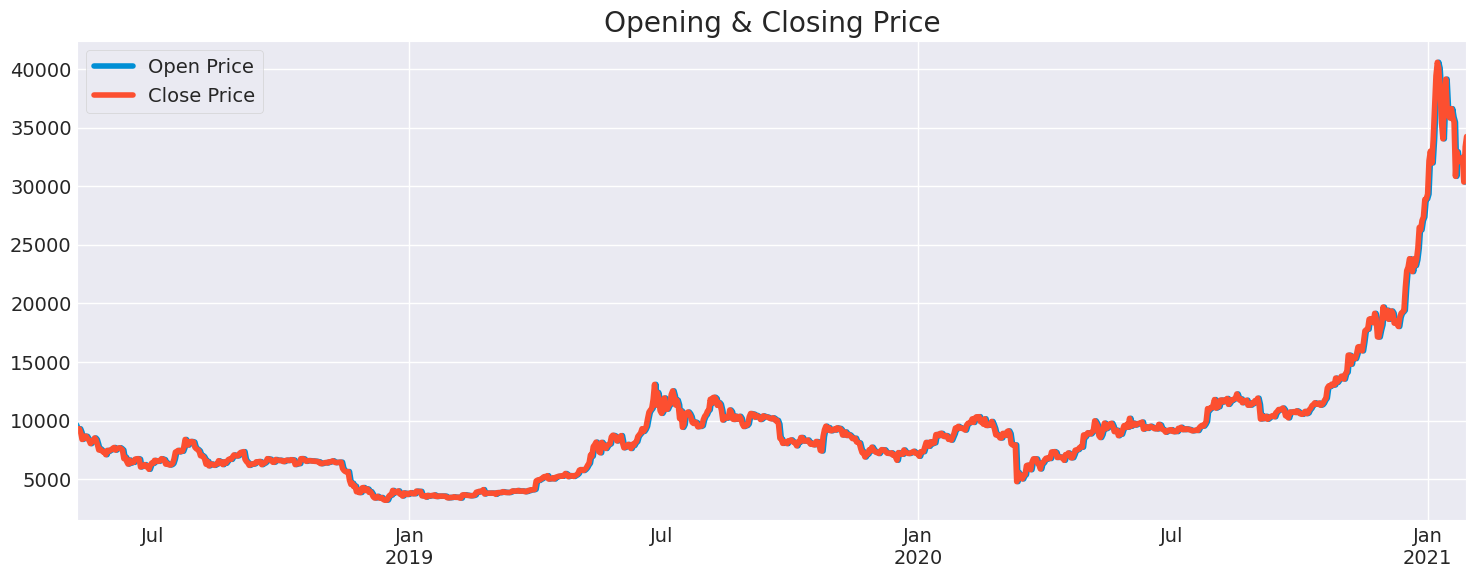

In [9]:
plt.figure(figsize=(15, 6))
df['open_USD'].plot()
df['close_USD'].plot()
plt.title("Opening & Closing Price")
plt.legend(['Open Price', 'Close Price'])
plt.tight_layout()
plt.show()

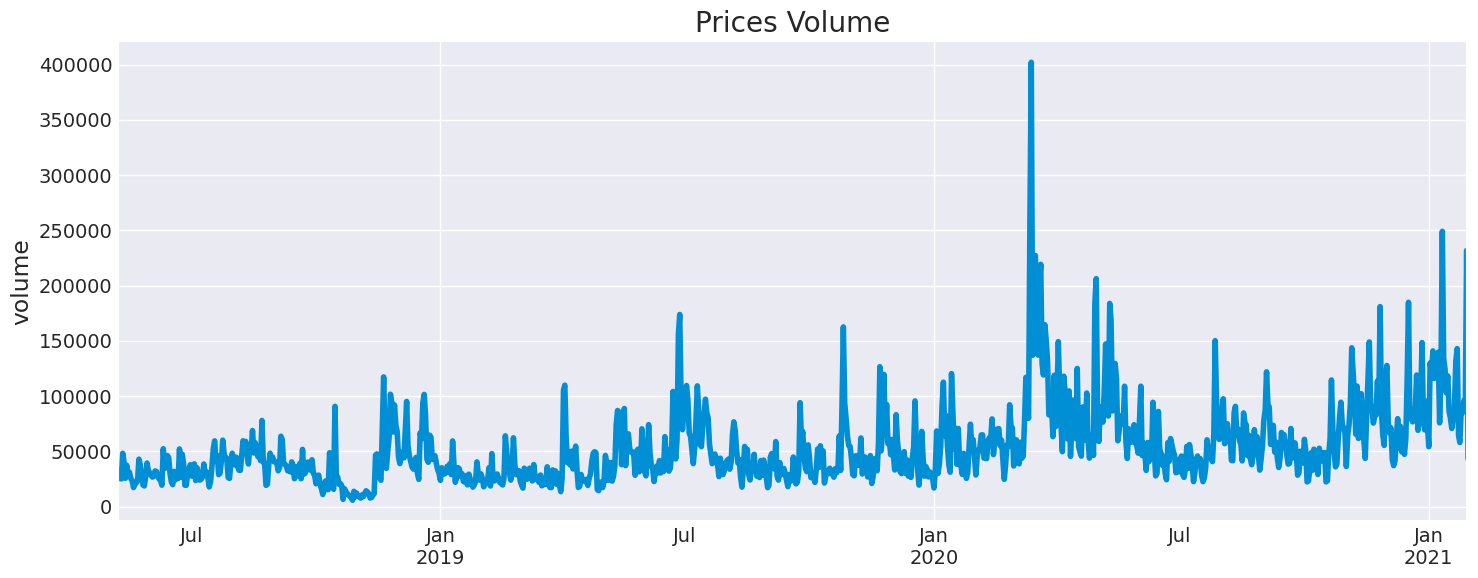

In [10]:
plt.figure(figsize=(15, 6))
df['volume'].plot()
plt.ylabel('volume')
plt.title("Prices Volume")
plt.tight_layout()
plt.show()

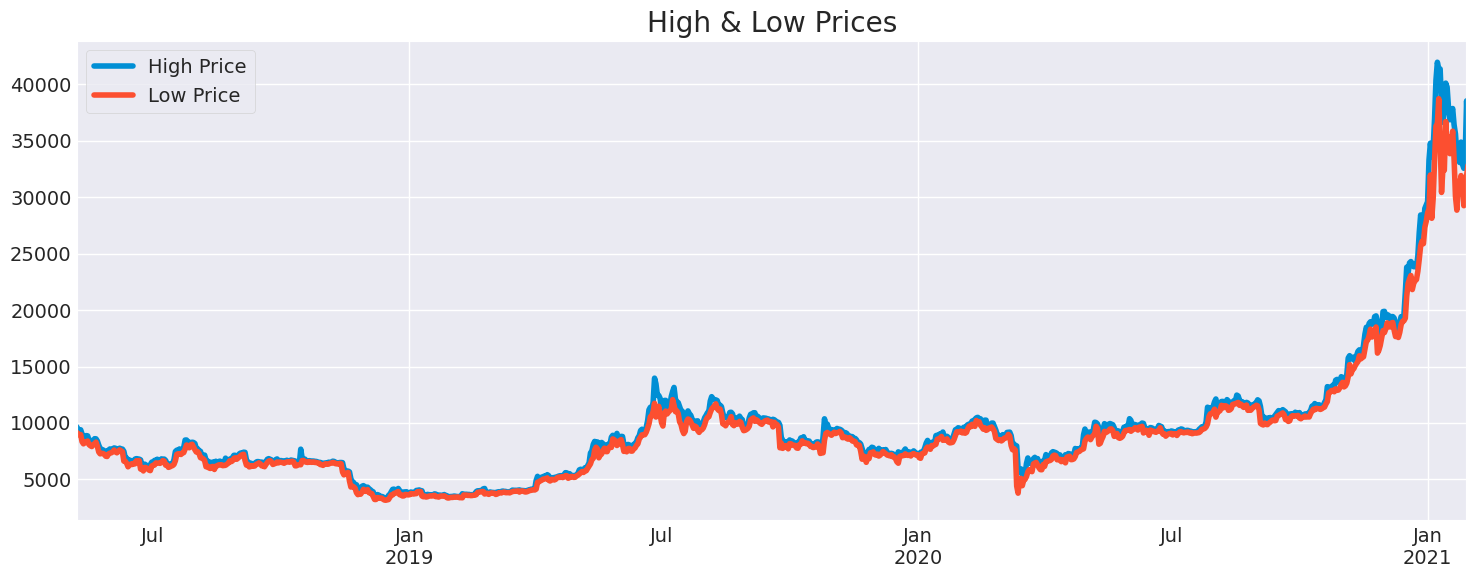

In [11]:
plt.figure(figsize=(15, 6))
df['high_USD'].plot()
df['low_USD'].plot()
plt.title("High & Low Prices")
plt.legend(['High Price', 'Low Price'])
plt.tight_layout()
plt.show()

## Choosing Prediction Column

In [12]:
dataset = df['close_USD']
dataset = pd.DataFrame(dataset)

data = dataset.values
data.shape

(1000, 1)

## Normalizing Data

In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

## Splitting the Data

In [14]:
# 75% to Train , 25% to Test
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 750 Test Size : 250


In [16]:
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size-60:, :]

In [17]:
train_data.shape, test_data.shape

((750, 1), (310, 1))

## Creating training set

In [18]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [19]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [21]:
x_train.shape, y_train.shape

((690, 60, 1), (690,))

# LSTM Model

## Model Structure

In [22]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1) ),
    LSTM(64, return_sequences=False),
    
    Dense(32),
    Dense(16),
    Dense(1)
])

model.compile(optimizer='adam', loss= 'mse', metrics=['mean_absolute_error'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,465 (165.88 KB)

 Trainable params: 42,465 (165.88 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [24]:
early_stopping = EarlyStopping(
    patience=10,
    monitor='loss',
    restore_best_weights=True
)

In [25]:
# Fitting the LSTM to the Training set
history = model.fit(x_train, y_train, epochs=100, batch_size=32, callbacks=early_stopping)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0041 - mean_absolute_error: 0.0503
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 5.2484e-04 - mean_absolute_error: 0.0161
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 3.3264e-04 - mean_absolute_error: 0.0133
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 2.4326e-04 - mean_absolute_error: 0.0115
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 3.1879e-04 - mean_absolute_error: 0.0121
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 2.2134e-04 - mean_absolute_error: 0.0104
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 2.6135e-04 - mean_absolute_error: 0.0112
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 1.9505e-04 - mean_absolute_error: 0.0101
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 2.1695e-04 - mean_absolute_error: 0.0106
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 2.0416e-04 - mean_absolute_error: 

## Model Evaluation

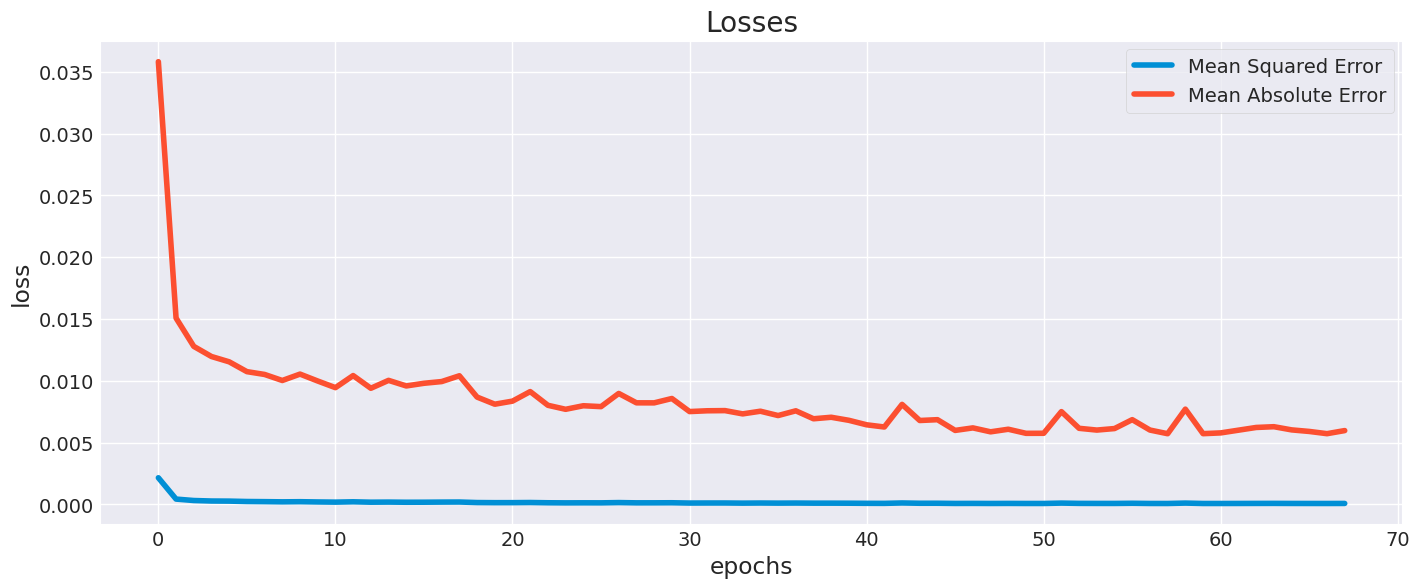

In [26]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])
plt.legend(['Mean Squared Error', 'Mean Absolute Error'])
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

# Predection

## Creating testing set

In [27]:
# Creating a testing set with 60 time-steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [28]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [29]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
x_test.shape, y_test.shape

((250, 60, 1), (250,))

In [31]:
# inverse y_test scaling 
predictions = model.predict(x_test)

# inverse predictions scaling 
predictions = scaler.inverse_transform(predictions)
predictions.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


(250, 1)

## Root mean square error

In [32]:
# inverse y_test scaling 
y_test = scaler.inverse_transform([y_test])

RSME = np.sqrt(np.mean( y_test - predictions)**2).round(2)
RSME

1043.23

In [33]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})
preds_acts

,Predictions,Actuals
0,8697.776367,8841.18
1,8711.477539,9204.07
2,8969.516602,9575.89
3,9354.045898,9427.07
4,9409.932617,9697.72
...,...,...
245,28386.230469,32467.77
246,28593.746094,30366.15
247,26849.912109,33364.86
248,28815.710938,34252.20


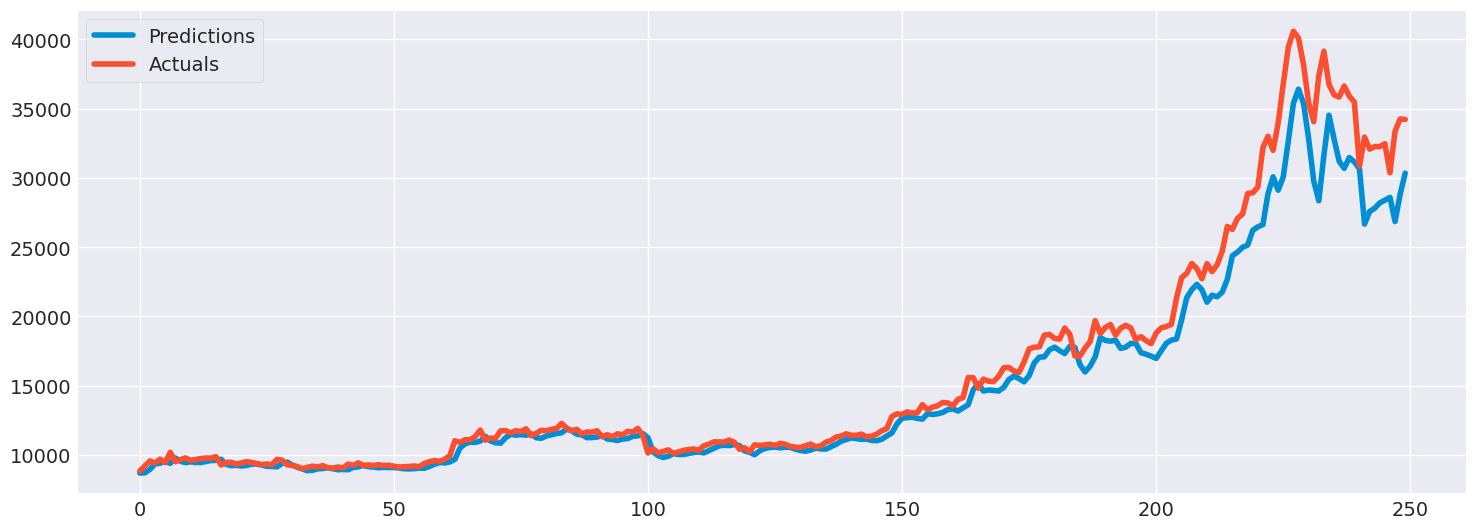

In [34]:
plt.figure(figsize = (16, 6))
plt.plot(preds_acts['Predictions'])
plt.plot(preds_acts['Actuals'])
plt.legend(['Predictions', 'Actuals'])
plt.show()

## Visualize Predictions with The Data

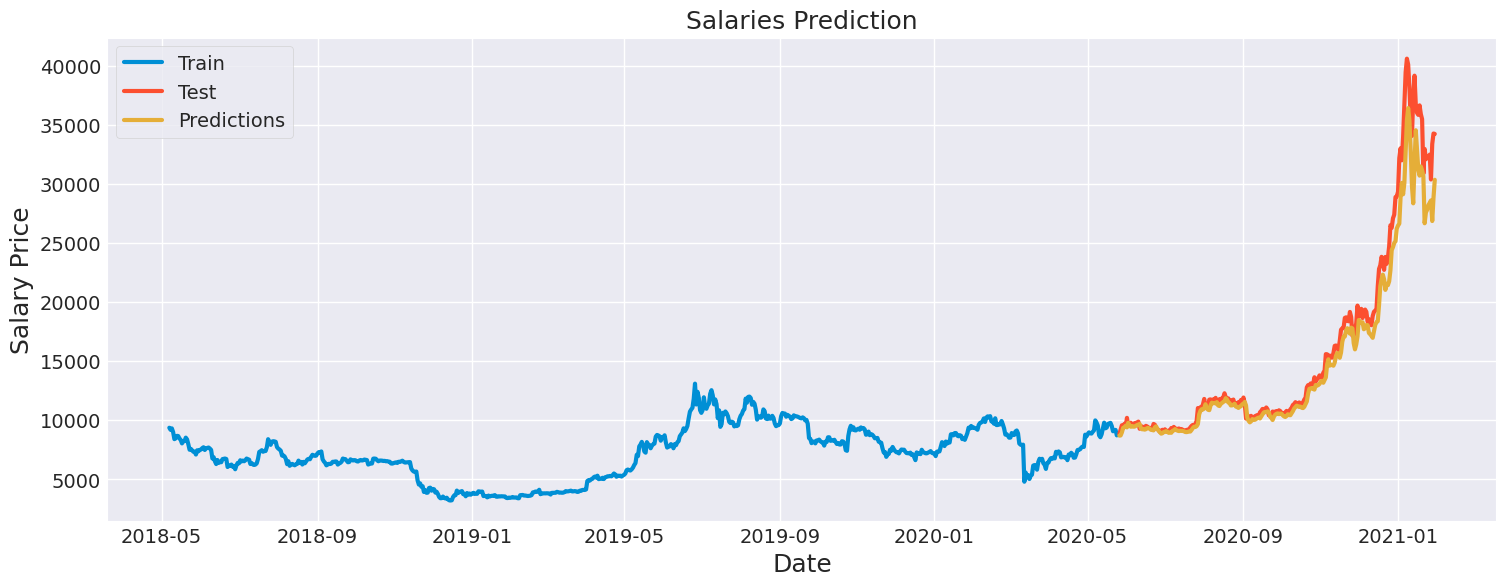

In [35]:
train = dataset.iloc[:train_size , 0:1]
test = dataset.iloc[train_size: , 0:1]
test['Predictions'] = predictions

plt.figure(figsize= (16, 6))
plt.title('Salaries Prediction', fontsize= 18)
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Salary Price', fontsize= 18)
plt.plot(train['close_USD'], linewidth= 3)
plt.plot(test['close_USD'], linewidth= 3)
plt.plot(test["Predictions"], linewidth= 3)
plt.legend(['Train', 'Test', 'Predictions'])

# Multivariate Predection

In [36]:
df.head()

,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787
2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227


In [37]:
cols = list(df.loc[:, ['open_USD', 'high_USD', 'low_USD', 'close_USD', 'volume']])
dataset = df[cols]
dataset = pd.DataFrame(dataset)

data = dataset.values
data.shape

(1000, 5)

## Data Normalization

In [38]:
scaled_data = scaler.fit_transform(data)

## Data Splitting

In [39]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size-60:, :]

Train Size : 750 Test Size : 250


In [40]:
train_data.shape, test_data.shape

((750, 5), (310, 5))

## Creating Train Data

In [41]:
# Creating a Training set with 60 time-steps
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, :5])
    y_train.append(train_data[i, :5])

In [42]:
# Convert to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [43]:
# Reshaping the input to (n_samples, time_steps, n_feature)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 5))

In [44]:
x_train.shape, y_train.shape

((690, 60, 5), (690, 5))

## Model Structure

In [45]:
model2 = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], 5)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(5)
])

model2.compile(optimizer= 'adam', loss= 'mse' , metrics= ["mean_absolute_error"])

In [46]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        29,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,333 (169.27 KB)

 Trainable params: 43,333 (169.27 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training

In [47]:
early_stopping = EarlyStopping(
    patience=10,
    monitor='loss',
    restore_best_weights=True
)

In [48]:
# Fitting the LSTM to the Training set
history2 = model2.fit(x_train, y_train, epochs= 100, batch_size= 32, callbacks=early_stopping)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0060 - mean_absolute_error: 0.0559
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0015 - mean_absolute_error: 0.0235
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0013 - mean_absolute_error: 0.0211
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0012 - mean_absolute_error: 0.0187
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0012 - mean_absolute_error: 0.0184
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0010 - mean_absolute_error: 0.0181    
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0014 - mean_absolute_error: 0.0173
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 9.3046e-04 - mean_absolute_error: 0.0165
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 9.5968e-04 - mean_absolute_error: 0.0179
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0011 - mean_absolute_error: 0.0167
Epoch 11/100
22/2

## Model Evaluation

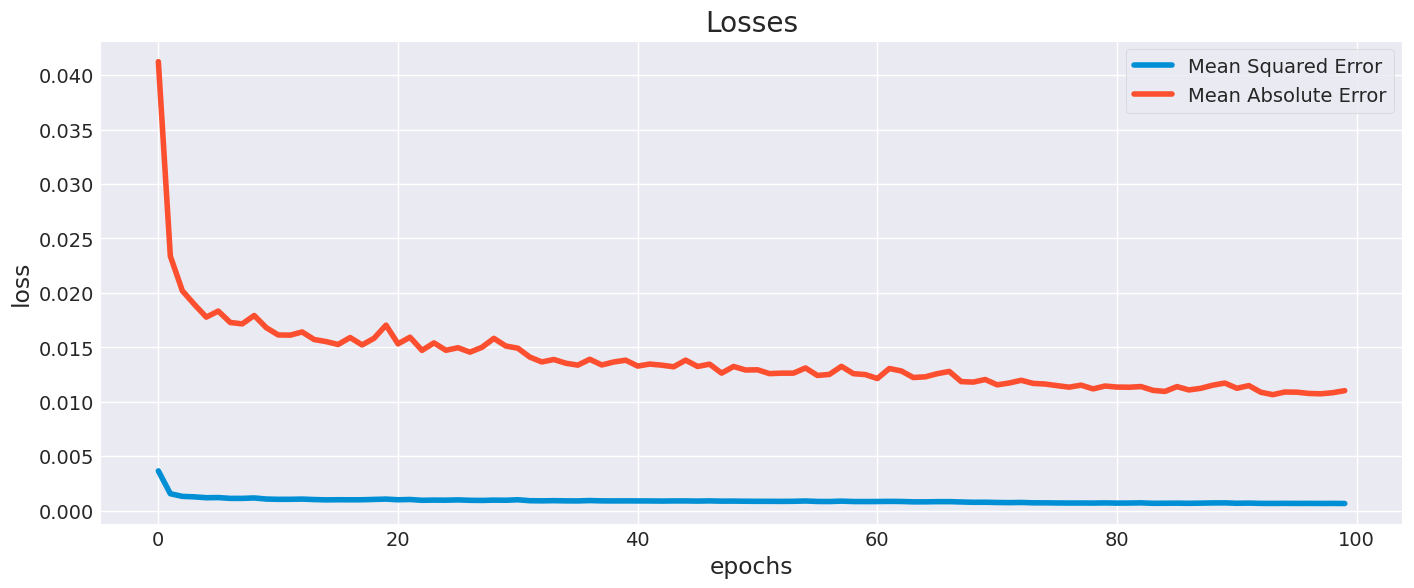

In [49]:
plt.figure(figsize=(15,6))
plt.plot(history2.history['loss'])
plt.plot(history2.history['mean_absolute_error'])
plt.legend(['Mean Squared Error', 'Mean Absolute Error'])
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

## Prediction

### Creating Test Data

In [50]:
# Creating a testing set with 60 time-steps and 1 output
x_test = []
y_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i , :5])
    y_test.append(test_data[i , :5])

In [51]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [52]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 5))

In [53]:
x_test.shape , y_test.shape

((250, 60, 5), (250, 5))

In [54]:
# Get Prediction
predictions = model2.predict(x_test)

# inverse predictions scaling 
predictions = scaler.inverse_transform(predictions)
predictions.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


(250, 5)

In [55]:
#inverse y_test scaling
y_test = scaler.inverse_transform(y_test)

In [56]:
RMSE = np.sqrt(np.mean( y_test - predictions )**2).round(2)
RMSE

2808.88